# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
weather_api_key

'0681dc3d09ab3252da5f259c0e1c4e13'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
np.random.seed(3)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
url = f"{base_url}appid={weather_api_key}&units={units}&q="

url

'https://api.openweathermap.org/data/2.5/weather?appid=0681dc3d09ab3252da5f259c0e1c4e13&units=metric&q='

In [76]:
cities[1]


'zakharo'

In [5]:
test_city = requests.get(url + "mariestad").json()
test_city["clouds"]["all"]

55

In [6]:
#Creating lists to create data frame
city_name = []
lat_list = []
lng_list = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
record = 0


In [7]:
print("Beginning Data Retrieval")
print("--------------------------")
for city in cities:
    try:
        response = requests.get(url+ city).json()
        city_name.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        record += 1
        print(f'Processing Record {record} | {city}')
    except:
        print("City not found. Skipping...")
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")    

Beginning Data Retrieval
--------------------------
Processing Record 1 | santa cruz
City not found. Skipping...
Processing Record 2 | mataura
Processing Record 3 | amapa
Processing Record 4 | thompson
Processing Record 5 | khatanga
Processing Record 6 | kaitangata
Processing Record 7 | rikitea
Processing Record 8 | victoria
Processing Record 9 | bluff
Processing Record 10 | lata
Processing Record 11 | naze
Processing Record 12 | bambous virieux
Processing Record 13 | marsa matruh
Processing Record 14 | kapaa
Processing Record 15 | raga
Processing Record 16 | jamestown
City not found. Skipping...
Processing Record 17 | saint george
Processing Record 18 | east london
Processing Record 19 | dhidhdhoo
Processing Record 20 | nanortalik
Processing Record 21 | geraldton
Processing Record 22 | castro
City not found. Skipping...
City not found. Skipping...
Processing Record 23 | tuktoyaktuk
Processing Record 24 | shingu
Processing Record 25 | klaksvik
Processing Record 26 | hervey bay
Processi

Processing Record 235 | qaqortoq
Processing Record 236 | bhainsdehi
Processing Record 237 | hithadhoo
Processing Record 238 | biak
Processing Record 239 | papagaios
Processing Record 240 | vardo
Processing Record 241 | sur
Processing Record 242 | severo-kurilsk
Processing Record 243 | ostrovnoy
City not found. Skipping...
Processing Record 244 | huarmey
Processing Record 245 | otradnoye
Processing Record 246 | kyren
Processing Record 247 | mbandaka
Processing Record 248 | borgarnes
Processing Record 249 | ozernovskiy
Processing Record 250 | raudeberg
Processing Record 251 | yulara
Processing Record 252 | clarence town
City not found. Skipping...
Processing Record 253 | gavle
Processing Record 254 | la asuncion
Processing Record 255 | valparaiso
Processing Record 256 | savannah bight
City not found. Skipping...
Processing Record 257 | horsham
Processing Record 258 | vaini
Processing Record 259 | dale
Processing Record 260 | mutuipe
Processing Record 261 | maniitsoq
Processing Record 262

Processing Record 456 | bengkulu
Processing Record 457 | sheridan
Processing Record 458 | hirado
City not found. Skipping...
Processing Record 459 | berlevag
Processing Record 460 | camacha
Processing Record 461 | taunggyi
Processing Record 462 | tabou
Processing Record 463 | tamiahua
Processing Record 464 | mucurapo
Processing Record 465 | qandala
Processing Record 466 | caibarien
Processing Record 467 | kismayo
Processing Record 468 | farafangana
Processing Record 469 | gamba
Processing Record 470 | natick
Processing Record 471 | santiago del estero
Processing Record 472 | bara
Processing Record 473 | korla
Processing Record 474 | tabuk
Processing Record 475 | ocumare del tuy
Processing Record 476 | grindavik
Processing Record 477 | denison
Processing Record 478 | arica
Processing Record 479 | shakawe
Processing Record 480 | avera
Processing Record 481 | belmonte
City not found. Skipping...
Processing Record 482 | leningradskiy
Processing Record 483 | petropavlovsk-kamchatskiy
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
city_data_df = pd.DataFrame({"City":city_name, "Lat":lat_list, "Lng":lng_list, "Max Temp":max_temp, "Humidity": humidity,
                            "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country, "Date": date})
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santa Cruz de la Sierra,-17.8000,-63.1667,18.03,68,75,12.86,BO,1660058961
1,Mataura,-46.1927,168.8643,-3.04,96,7,0.85,NZ,1660059349
2,Amapá,1.0000,-52.0000,33.03,39,67,2.47,BR,1660059350
3,Thompson,55.7435,-97.8558,14.09,82,75,6.17,CA,1660059351
4,Khatanga,71.9667,102.5000,14.03,76,77,4.94,RU,1660059353
...,...,...,...,...,...,...,...,...,...
556,Potiskum,11.7091,11.0694,32.44,39,15,2.01,NG,1660060213
557,Maralal,1.0968,36.6980,19.02,64,100,1.60,KE,1660060214
558,Dwārka,22.2394,68.9678,28.70,84,100,6.87,IN,1660060215
559,Sonkovo,57.7782,37.1571,18.11,62,33,2.95,RU,1660060217


In [75]:
city_data_df.to_csv("output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [44]:
#  Get the indices of cities that have humidity over 100%.
city_data_df.loc[city_data_df["Humidity"] > 100, :]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,26.99,77,40,6.17,US,1651608887
1,barrow,71.2906,-156.7887,-5.99,86,100,5.14,US,1651608707
2,busselton,-33.6500,115.3333,13.33,68,84,4.85,AU,1651608889
3,mar del plata,-38.0023,-57.5575,16.08,59,0,6.17,AR,1651608890
4,vaini,-21.2000,-175.2000,23.09,88,20,2.57,TO,1651608890


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

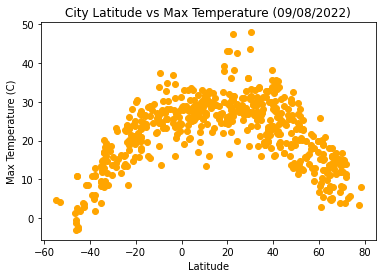

In [80]:
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
plt.scatter(latitude, temperature, color = "orange")
plt.title("City Latitude vs Max Temperature (09/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.savefig("output_data/lat vs max temp.png")
plt.show()
#This code analyses the relationship between city latitude and max temperature. We can see as we approach 0 latitude we 
# see max temperature increase then decrease again as we move away. This is due to temperatures being higher near equator.


## Latitude vs. Humidity Plot

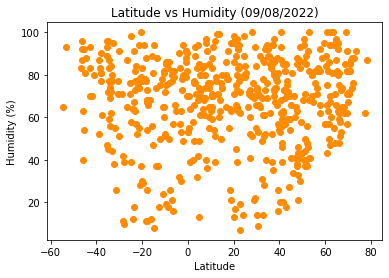

In [81]:
humidity_for_plot = city_data_df["Humidity"]
plt.scatter(latitude, humidity_for_plot, color = "darkorange")
plt.title("Latitude vs Humidity (09/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/lat vs humidity.png")
plt.show()
#There is no clear relationship between humidity and latitude.

## Latitude vs. Cloudiness Plot

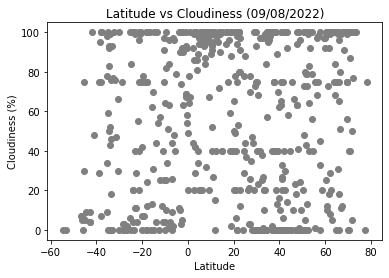

In [90]:
cloudiness_for_plot = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness_for_plot, color = "grey")
plt.title("Latitude vs Cloudiness (09/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/lat vs cloudiness.png")
plt.show()
#There is no clear relationship between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

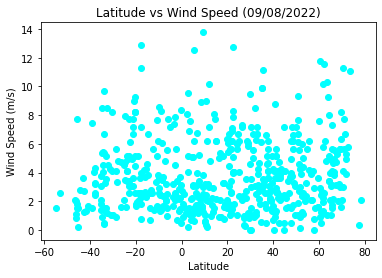

In [95]:
wind_speed_for_plot = city_data_df["Wind Speed"]
plt.scatter(latitude, wind_speed_for_plot, color = "cyan")
plt.title("Latitude vs Wind Speed (09/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.savefig("output_data/lat vs wind speed.png")
plt.show()
#There is no clear relationship between latitude and wind speed.

## Linear Regression

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4362117223490635
The correlation coefficient is : -0.66


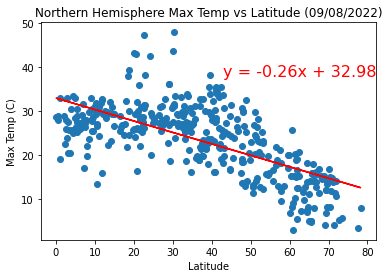

In [241]:
#Finding Northern Hemisphere temperatures and latitudes
nh_temperature = city_data_df.loc[city_data_df["Lat"]>= 0, "Max Temp"]
nh_lat = city_data_df.loc[city_data_df["Lat"]>= 0, "Lat"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nh_lat, nh_temperature)
regress_values = nh_lat * slope + intercept
line_eq = (f'y = {round(slope,2)}x + {round(intercept,2)}')
plt.scatter(nh_lat, nh_temperature)
plt.plot(nh_lat, regress_values,"red")
plt.annotate(line_eq,(43,38),color="red",fontsize=16)
plt.title("Northern Hemisphere Max Temp vs Latitude (09/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
print(f"The r-squared is: {rvalue**2}")
print(f'The correlation coefficient is : {round(rvalue,3)}')
plt.show()
#This regression is modelling the relationship between Northern Hemisphere max temp and latitude. We can observe a negative
# correlation coeffient as latitude increases from 0. This indicates decreasing max temperatures as we move away from the
# equator which is consistent with our understanding of higher temperatures in closer vicinity to the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7007025178060371
The correlation coefficient is : 0.837


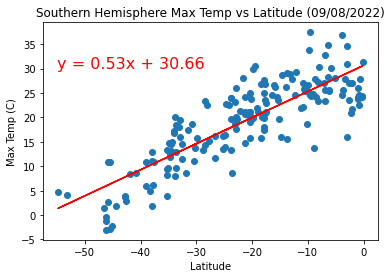

In [240]:
#Finding Southern Hemisphere temperatures and latitudes
sh_temperature = city_data_df.loc[city_data_df["Lat"]<= 0, "Max Temp"]
sh_lat = city_data_df.loc[city_data_df["Lat"]<= 0, "Lat"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sh_lat, sh_temperature)
regress_values = sh_lat * slope + intercept
line_eq = (f'y = {round(slope,2)}x + {round(intercept,2)}')
plt.scatter(sh_lat, sh_temperature)
plt.plot(sh_lat, regress_values,"red")
plt.annotate(line_eq,(-55,30),color="red",fontsize=16)
plt.title("Southern Hemisphere Max Temp vs Latitude (09/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
print(f"The r-squared is: {rvalue**2}")
print(f'The correlation coefficient is : {round(rvalue,3)}')
plt.show()
# This model is showing Souther Hemisphere max temperatures vs latitude. We see a strong correlation coefficient of 0.83
# indicating that as we move towards the equator, max temperatures will increase.


### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.003987412128708343
The correlation coefficient is : 0.063


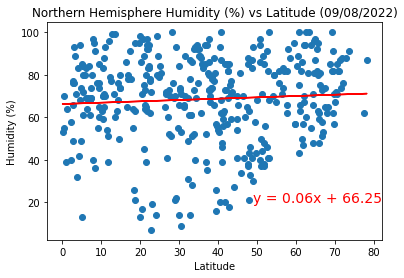

In [249]:
nh_humidity = city_data_df.loc[city_data_df["Lat"]>= 0, "Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nh_lat, nh_humidity)
regress_values = nh_lat * slope + intercept
line_eq = (f'y = {round(slope,2)}x + {round(intercept,2)}')
plt.scatter(nh_lat, nh_humidity)
plt.plot(nh_lat, regress_values,"red")
plt.annotate(line_eq,(49,20),color="red",fontsize=14)
plt.title("Northern Hemisphere Humidity (%) vs Latitude (09/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")
print(f"The r-squared is: {(rvalue**2)}")
print(f'The correlation coefficient is : {round(rvalue,3)}')
plt.show()
#This model shows the relationship between humidity and latitude in the Northern Hemisphere. There is no clear relationship.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.019246786247061696
The correlation coefficient is : -0.139


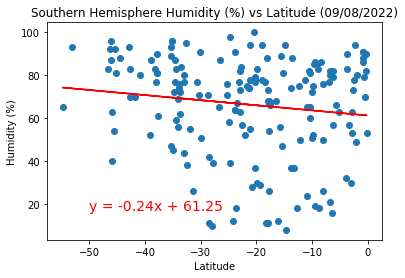

In [257]:
sh_humidity = city_data_df.loc[city_data_df["Lat"]<= 0, "Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sh_lat, sh_humidity)
regress_values = sh_lat * slope + intercept
line_eq = (f'y = {round(slope,2)}x + {round(intercept,2)}')
plt.scatter(sh_lat, sh_humidity)
plt.plot(sh_lat, regress_values,"red")
plt.annotate(line_eq,(-50,17),color="red",fontsize=14)
plt.title("Southern Hemisphere Humidity (%) vs Latitude (09/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")
print(f"The r-squared is: {(rvalue**2)}")
print(f'The correlation coefficient is : {round(rvalue,3)}')
plt.show()
#This model shows the relationship between humidity and latitude in the Southern Hemisphere. There is no clear relationship.

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01404134090969126
The correlation coefficient is : -0.118


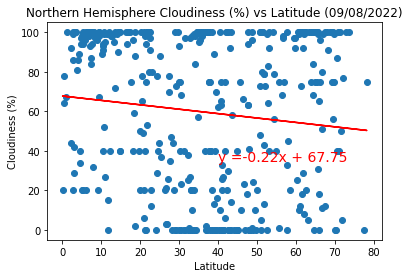

In [264]:
nh_cloudiness = city_data_df.loc[city_data_df["Lat"]>= 0, "Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nh_lat, nh_cloudiness)
regress_values = nh_lat * slope + intercept
line_eq = (f'y ={round(slope,2)}x + {round(intercept,2)}')
plt.scatter(nh_lat, nh_cloudiness)
plt.plot(nh_lat, regress_values,"red")
plt.annotate(line_eq,(40,35),color="red",fontsize=14)
plt.title("Northern Hemisphere Cloudiness (%) vs Latitude (09/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
print(f"The r-squared is: {(rvalue**2)}")
print(f'The correlation coefficient is : {round(rvalue,3)}')
plt.show()
#This model shows the relationship between cloudiness and latitude in the Northern Hemisphere. There is no clear relationship.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.029273227144613435
The correlation coefficient is : 0.171


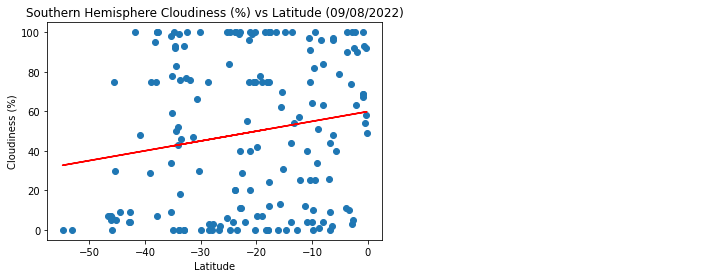

In [266]:
sh_cloudiness = city_data_df.loc[city_data_df["Lat"]<= 0, "Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sh_lat, sh_cloudiness)
regress_values = sh_lat * slope + intercept
line_eq = (f'y ={round(slope,2)}x + {round(intercept,2)}')
plt.scatter(sh_lat, sh_cloudiness)
plt.plot(sh_lat, regress_values,"red")
plt.annotate(line_eq,(40,35),color="red",fontsize=14)
plt.title("Southern Hemisphere Cloudiness (%) vs Latitude (09/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
print(f"The r-squared is: {(rvalue**2)}")
print(f'The correlation coefficient is : {round(rvalue,3)}')
plt.show()
#This model shows the relationship between cloudiness and latitude in the Southern Hemisphere. There is no clear relationship.

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006736745751564136
The correlation coefficient is : 0.082


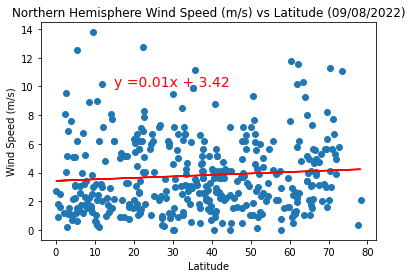

In [273]:
nh_wind_speed = city_data_df.loc[city_data_df["Lat"]>= 0, "Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nh_lat, nh_wind_speed)
regress_values = nh_lat * slope + intercept
line_eq = (f'y ={round(slope,2)}x + {round(intercept,2)}')
plt.scatter(nh_lat, nh_wind_speed)
plt.plot(nh_lat, regress_values,"red")
plt.annotate(line_eq,(15,10),color="red",fontsize=14)
plt.title("Northern Hemisphere Wind Speed (m/s) vs Latitude (09/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.savefig("output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
print(f"The r-squared is: {(rvalue**2)}")
print(f'The correlation coefficient is : {round(rvalue,3)}')
plt.show()
#This model shows the relationship between wind speed and latitude in the Northern Hemisphere. There is no clear relationship.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007543347066980686
The correlation coefficient is : 0.087


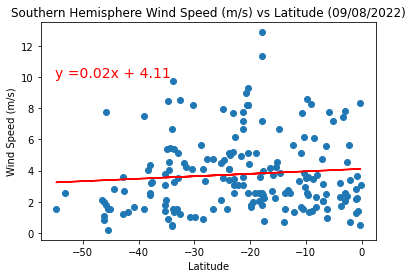

In [278]:
sh_wind_speed = city_data_df.loc[city_data_df["Lat"]<= 0, "Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sh_lat, sh_wind_speed)
regress_values = sh_lat * slope + intercept
line_eq = (f'y ={round(slope,2)}x + {round(intercept,2)}')
plt.scatter(sh_lat, sh_wind_speed)
plt.plot(sh_lat, regress_values,"red")
plt.annotate(line_eq,(-55,10),color="red",fontsize=14)
plt.title("Southern Hemisphere Wind Speed (m/s) vs Latitude (09/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.savefig("output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
print(f"The r-squared is: {(rvalue**2)}")
print(f'The correlation coefficient is : {round(rvalue,3)}')
plt.show()
#This model shows the relationship between wind speed and latitude in the Southern Hemisphere. There is no clear relationship.